<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OSI_SAF_sea_ice_file_structure.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3b_OSI_SAF_sea_ice_mapping_Ice_Edge.ipynb" target="_blank">NEXT NOTEBOOK >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea ice parameters : Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1_OSI_SAF_sea_ice_FTP_data_access.ipynb" target="_blank">1_1_OSI_SAF_sea_ice_FTP_data_access.ipynb</a>**

</div>
<hr>

# 1.3a Map Sea Ice Concentration - Downloaded from OSI SAF HL FTP
### Data used 

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-------------:|:-----------------:|:-----------------:|
| Global Sea Ice Concentration (SSMIS) | EO:EUM:DAT:DMSP:OSI-401-B | <a href="https://osi-saf.eumetsat.int/products/osi-401-b" target="_blank">link</a>   | OSI-401-B |


### Learning outcomes

At the end of this notebook you will know;
* How to open Sea Ice Concentration netcdf
* Map Sea Ice Concentration using cartopy 

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Map - Sea Ice Concentration - Northern Hemisphere](#section1)
 1. [Map - Sea Ice Concentration - Southern Hemisphere](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports 
import os                                     # a library that allows us access to basic operating system commands
import xarray as xr                           # a library that supports the use of multi-dimensional arrays in Python
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean                                # colormaps for ocean products
import cmcrameri                              # scientific colormaps for data visualisation

<div class="alert alert-danger" role="alert">

## <a id='section1'></a>1. Map - Sea Ice Concentration - Northern Hemisphere
[Back to top](#TOC_TOP)

</div>

Setting directory where to read data files

In [2]:
directory = 'products/sea_ice_concentration/nh/'

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>.   
However, we recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> or that you use scientific colormaps for data visulaisation from librairies such as cmcrameri.

In [3]:
#cmap = mpl_cm.get_cmap('jet')
#cmap = cmocean.cm.ice
cmap = cmcrameri.cm.oslo

Sea Ice concentration data has a specific projection. We can explore the netcdf file to find the characteristics.

In [4]:
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)

In [15]:
nc

<xarray.Dataset>
Dimensions:                   (time: 1, nv: 2, xc: 760, yc: 1120)
Coordinates:
  * time                      (time) datetime64[ns] 2022-11-03T12:00:00
  * xc                        (xc) float64 -3.845e+03 -3.835e+03 ... 3.745e+03
  * yc                        (yc) float64 5.845e+03 5.835e+03 ... -5.345e+03
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 -2147483647
    time_bnds                 (time, nv) datetime64[ns] 2022-11-03 2022-11-04
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes: (12/30)
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    product_name:            osi_saf_ice_conc
    product_status:          operational
    abstract:                The daily analysis of sea ice concentration is o...
    topiccategory:           Oceans Climatology Meteorology Atmosphere
    ...                      ...
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    history:                 2022-11-04 creation
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    Conventions:             CF-1.6

Let's look at the projection information.

In [6]:
nc.variables['Polar_Stereographic_Grid']

<xarray.Variable ()>
array(-2147483647)
Attributes:
    grid_mapping_name:                      polar_stereographic
    false_easting:                          0.0
    false_northing:                         0.0
    semi_major_axis:                        6378273.0
    semi_minor_axis:                        6356889.44891
    straight_vertical_longitude_from_pole:  -45.0
    latitude_of_projection_origin:          90.0
    standard_parallel:                      70.0
    proj4_string:                           +proj=stere +a=6378273 +b=6356889...

You should be able see the 'proj4_string', it provides us with the information needed to define the cartopy projection setting of our input data :  
* +proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45   

Which we will translate into ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0).

Let's map the data in its original projection

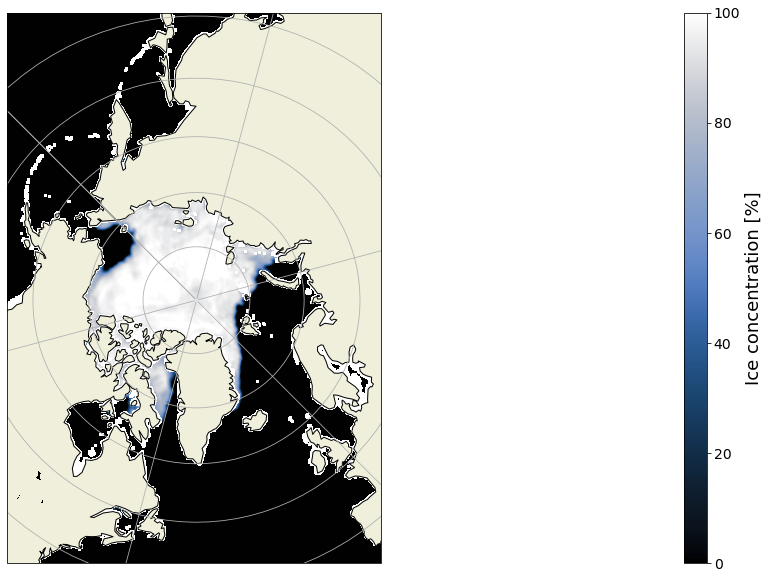

In [5]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)
output_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

# open and plot data
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:]
        ice_conc = nc.variables['ice_conc'][:]
        confidence_level  = nc.variables['confidence_level'][:]
        nc.close()
        
        # Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
        bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
        # plotting sea ice
        im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)

Reproject the data in an orthographic view.

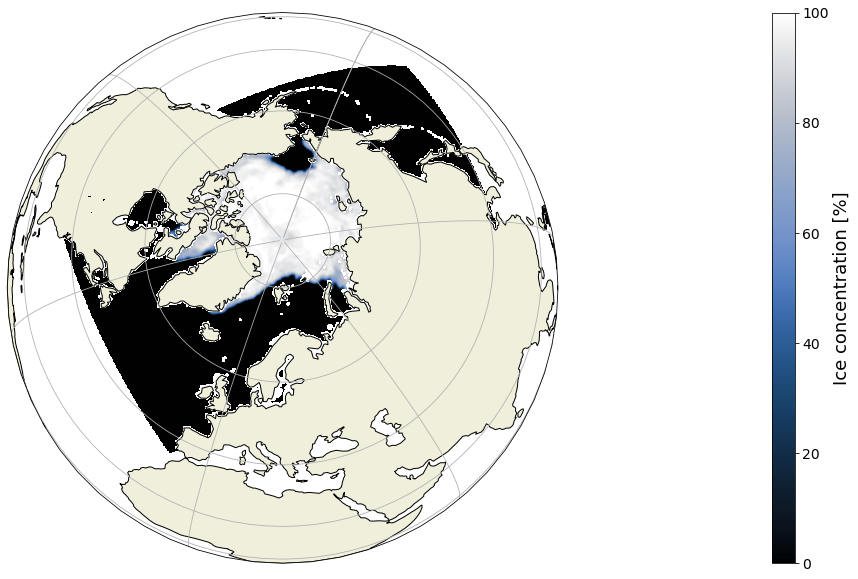

In [7]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)
output_projection=ccrs.Orthographic(20,80)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

# open and plot data
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:]
        ice_conc = nc.variables['ice_conc'][:]
        confidence_level  = nc.variables['confidence_level'][:]
        nc.close()
        
        # Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
        bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
        # plotting sea ice
        im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<div class="alert alert-danger" role="alert">

## <a id='section2'></a>2. Map - Sea Ice Concentration - Southern Hemisphere
[Back to top](#TOC_TOP)

</div>

Setting directory where to read data files

In [11]:
directory = 'products/sea_ice_concentration/sh/'

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>.   
However, we recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> or that you use scientific colormaps for data visulaisation from librairies such as cmcrameri.

In [12]:
#cmap = cmocean.cm.ice
cmap = cmcrameri.cm.oslo

Sea Ice concentration data has a specific projection. We can explore the netcdf file to find the characteristics.

In [13]:
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)

In [14]:
nc

<xarray.Dataset>
Dimensions:                   (time: 1, nv: 2, xc: 790, yc: 830)
Coordinates:
  * time                      (time) datetime64[ns] 2022-11-08T12:00:00
  * xc                        (xc) float64 -3.945e+03 -3.935e+03 ... 3.945e+03
  * yc                        (yc) float64 4.345e+03 4.335e+03 ... -3.945e+03
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    ice_conc                  (time, yc, xc) float32 ...
    ice_conc_unfiltered       (time, yc, xc) float32 ...
    masks                     (time, yc, xc) float32 ...
    confidence_level          (time, yc, xc) float32 ...
    status_flag               (time, yc, xc) float32 ...
    total_uncertainty         (time, yc, xc) float32 ...
    smearing_uncertainty      (time, yc, xc) float32 ...
    algorithm_uncertainty     (time, yc, xc) float32 ...
Attributes: (12/30)
    title:                   Daily Sea Ice Concentration Analysis from OSI SA...
    product_id:              OSI-401
    product_name:            osi_saf_ice_conc
    product_status:          operational
    abstract:                The daily analysis of sea ice concentration is o...
    topiccategory:           Oceans Climatology Meteorology Atmosphere
    ...                      ...
    references:              Product User Manual for OSI SAF Global Sea Ice C...
    history:                 2022-11-09 creation
    product_version:         4.0
    software_version:        1.3
    netcdf_version:          3.6.3
    Conventions:             CF-1.6

Let's look at the projection information.

In [15]:
nc.variables['Polar_Stereographic_Grid']

<xarray.Variable ()>
array(-2147483647)
Attributes:
    grid_mapping_name:                      polar_stereographic
    false_easting:                          0.0
    false_northing:                         0.0
    semi_major_axis:                        6378273.0
    semi_minor_axis:                        6356889.44891
    straight_vertical_longitude_from_pole:  0.0
    latitude_of_projection_origin:          -90.0
    standard_parallel:                      -70.0
    proj4_string:                           +proj=stere +a=6378273 +b=6356889...

You should be able see the 'proj4_string', it provides us with the information needed to define the cartopy projection setting of our input data :  
* +proj=stere +a=6378273 +b=6356889.44891 +lat_0=-90 +lat_ts=-70 +lon_0=0   

Which we will translate into ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0).

Let's map the data in its original projection

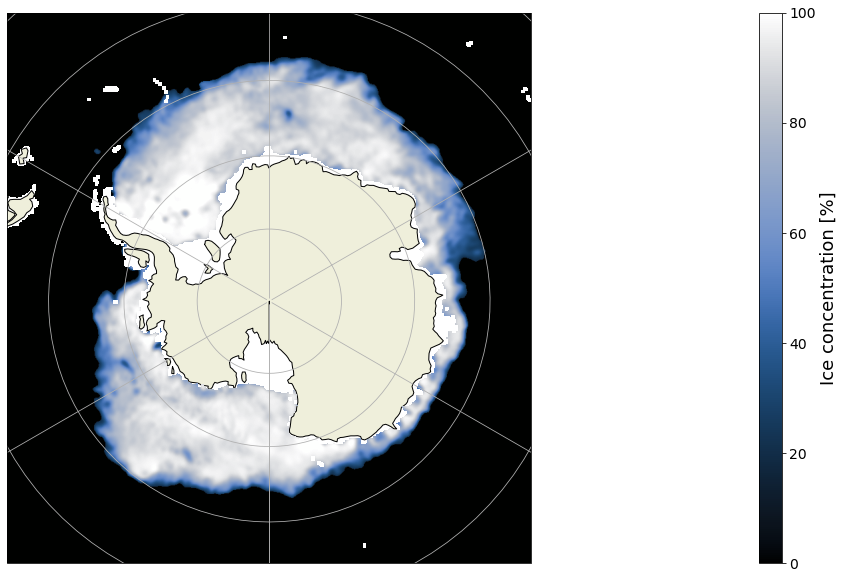

In [16]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
output_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

# open and plot data
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:]
        ice_conc = nc.variables['ice_conc'][:]
        confidence_level  = nc.variables['confidence_level'][:]
        nc.close()
        
        # Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
        bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
        # plotting sea ice
        im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)

You should notice on the figure above, that there are missing areas of data around the Antarctic continent. These correspond to Ice Shelves that are not included directly in cartopy LAND boundaries. So let's add them to the plot.

In [17]:
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='grey',
        edgecolor='grey')

Plot with Ice Shelves.

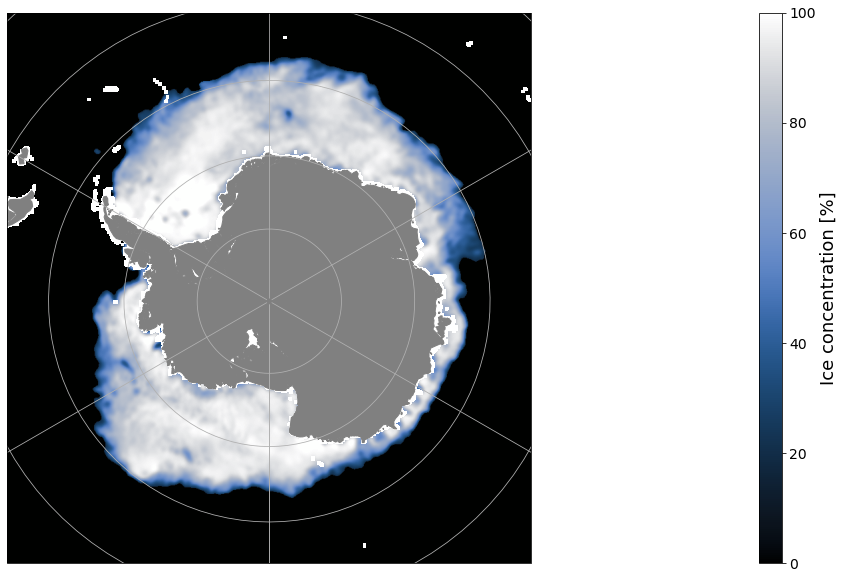

In [19]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
output_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.LAND, zorder=0, color='grey')
ax.add_feature(ice_shelves, )
ax.gridlines()

# open and plot data
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:]
        ice_conc = nc.variables['ice_conc'][:]
        confidence_level  = nc.variables['confidence_level'][:]
        nc.close()
        
        # Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
        bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
        # plotting sea ice
        im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)

Reproject the data in an orthographic view.

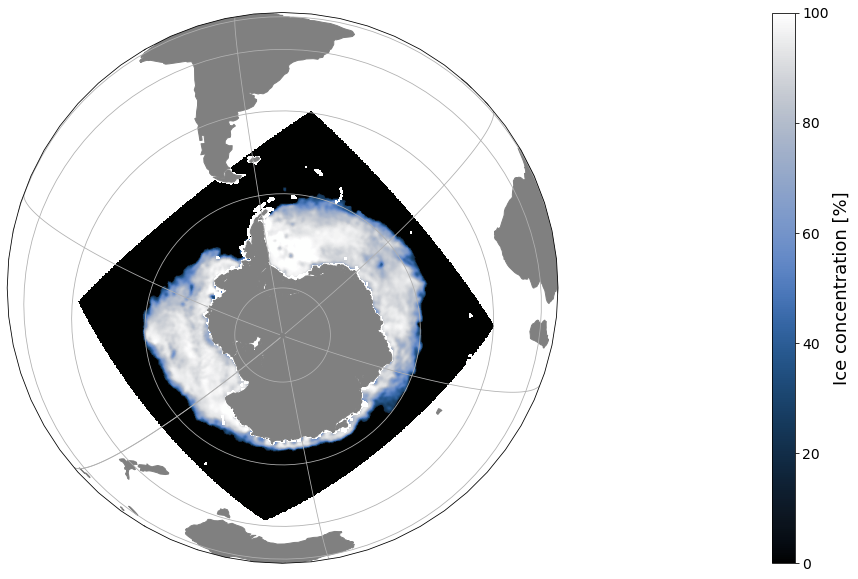

In [24]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0, true_scale_latitude=-70.0)
output_projection=ccrs.Orthographic(-50,-80)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.LAND, zorder=0, color='grey')
ax.add_feature(ice_shelves, )
ax.gridlines()

# open and plot data
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:]
        ice_conc = nc.variables['ice_conc'][:]
        confidence_level  = nc.variables['confidence_level'][:]
        nc.close()
        
        # Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
        bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
        # plotting sea ice
        im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OSI_SAF_sea_ice_file_structure.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3b_OSI_SAF_sea_ice_mapping_Ice_Edge.ipynb" target="_blank">NEXT NOTEBOOK >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>